- StaticArray with defined array size
-  Gauss–Legendre quadrature is a form of Gaussian quadrature for approximating the definite integral of a function

In [1]:
using DifferentialEquations, Parameters, ParameterizedFunctions, LinearAlgebra
using BenchmarkTools, Test, CSV, DataFrames, FastGaussQuadrature, StaticArrays

In [2]:
#using Revise
#Revise.track(joinpath(@__DIR__,"AtomInterferometrySims.jl"))
include("AtomInterferometrySims.jl")
using .AtomInterferometrySims

## test

In [3]:
num = 50000

cloud_r = 0.5e-3
cloud_T = [1e-3, 4e-3, 8e-3]

atom_init_pos = init_pos(cloud_r,num)

phase_out = [Vector{Float64}() for _ in cloud_T]

for (idx,T) in enumerate(cloud_T)

    atom_init_vel = init_pos(T,num)

    for i in 1:num
        r = atom_init_pos[i,:]
        v = atom_init_vel[i,:]
        push!(phase_out[idx],atom_phase_path_int(r,v,0.,1.,1.,[],0.1))
    end
end


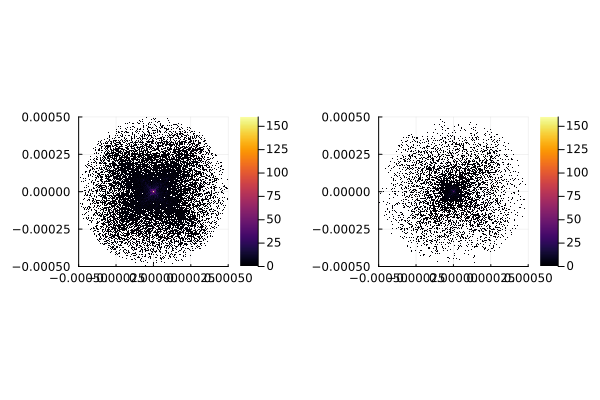

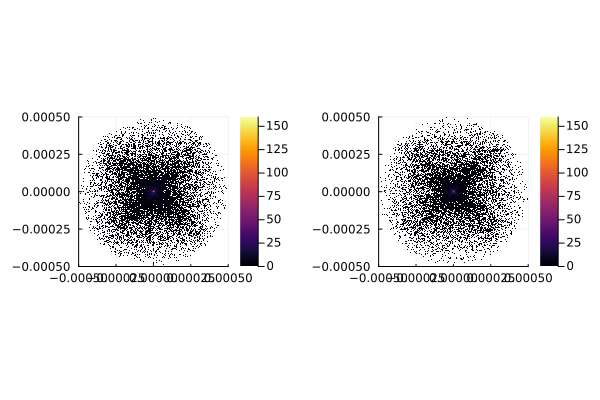

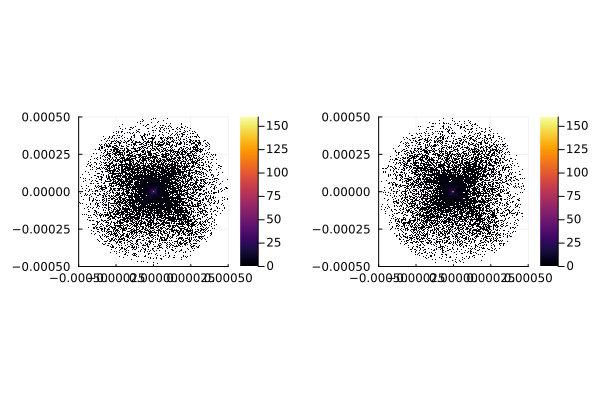

In [21]:
using Plots

for i in 1:length(cloud_T)
    mask = [cos(x)^2 > 0.5 for x in phase_out[i]]

    
    p1 = histogram2d(atom_init_pos[:,1][mask],atom_init_pos[:,2][mask],xlimits=(-cloud_r,cloud_r),bins = (400,400),ylimits=(-cloud_r,cloud_r),aspect_ratio = :equal,clims = (0,160))#,color=phase_out[1])
    
    p2 = histogram2d(atom_init_pos[:,1][.!mask],atom_init_pos[:,2][.!mask],xlimits=(-cloud_r,cloud_r),bins = (400,400),ylimits=(-cloud_r,cloud_r),aspect_ratio = :equal,clims = (0,160))#,color=phase_out[1])

    display(plot(p1,p2,layout = (1,2)))
    
    
end



In [17]:
phase_out_2 = [Vector{Float64}() for _ in cloud_T]

for (idx,T) in enumerate(cloud_T)

    atom_init_vel = init_pos(T,num)

    for i in 1:num
        r = atom_init_pos[i,:]
        v = atom_init_vel[i,:]
        push!(phase_out_2[idx],atom_phase_path_int(r,v,0.,1e-3,1.,[],0.1))
    end
end

In [31]:
for i in 1:length(cloud_T)
    mask = [cos(x)^2 > 0.5 for x in phase_out_2[i]]

    
    #p1 = histogram2d(atom_init_pos[:,1][mask],atom_init_pos[:,2][mask],xlimits=(-cloud_r,cloud_r),bins = (400,400),ylimits=(-cloud_r,cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])
    
    #p2 = histogram2d(atom_init_pos[:,1][.!mask],atom_init_pos[:,2][.!mask],xlimits=(-cloud_r,cloud_r),bins = (400,400),ylimits=(-cloud_r,cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

    #display(plot(p1,p2,layout = (1,2)))

    display(histogram2d(atom_init_pos[:,1][mask],atom_init_pos[:,2][mask],xlimits=(-cloud_r,cloud_r),bins = (200,200),ylimits=(-cloud_r,cloud_r),aspect_ratio = :equal))
    
end



BoundsError: BoundsError: attempt to access 0-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} at index [2]

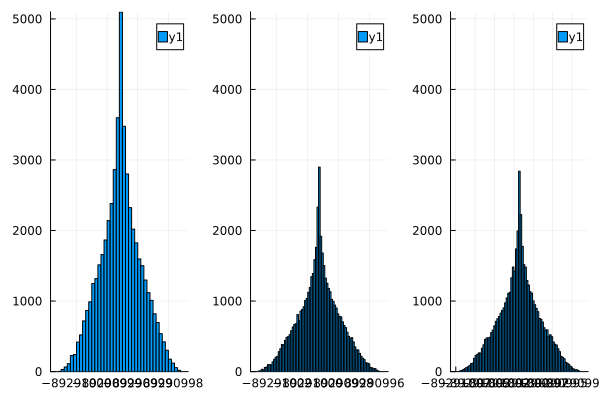

In [49]:
h1 = histogram(phase_out[1],ylimits = (0,5100))
h2 = histogram(phase_out[2],ylimits = (0,5100))
h3 = histogram(phase_out[3],ylimits = (0,5100))
plot(h1,h2,h3,layout=(1,3))

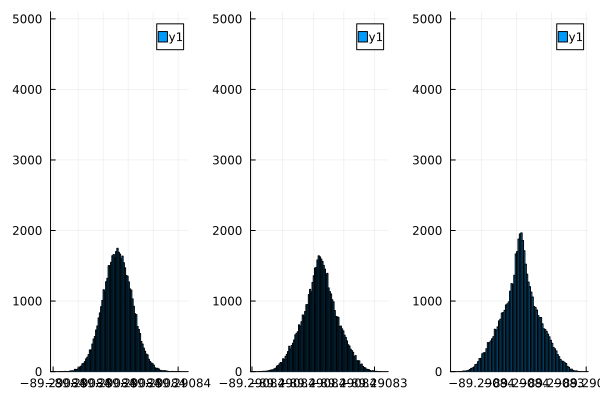

In [47]:
h1 = histogram(phase_out_2[1],ylimits = (0,5100),formatter = :plain)
h2 = histogram(phase_out_2[2],ylimits = (0,5100),formatter = :plain)
h3 = histogram(phase_out_2[3],ylimits = (0,5100),formatter = :plain)
plot(h1,h2,h3,layout=(1,3))

## with phase map

In [3]:
using CSV,DataFrames

phasemap = CSV.read("MZphase.csv",DataFrame;header=0)
phasemap = Matrix(phasemap)

1023×1023 Matrix{Float64}:
 3.5374   4.362     5.2087    6.0678  …  4.386     3.3531   2.3455  1.3181
 4.6352   5.4765    0.036479  0.8716     5.4974    4.4266   3.3834  2.351
 5.4785   0.041558  0.87986   1.7032     0.053983  5.2509   4.1881  3.15
 5.7048   0.27953   1.1229    1.9423     0.23989   5.4169   4.3479  3.3199
 5.6199   0.18668   1.0287    1.8539     0.1909    5.3849   4.3239  3.2896
 0.02815  0.87231   1.7034    2.5187  …  0.90251   6.0986   5.0213  3.9706
 0.95222  1.7889    2.5965    3.3849     1.8433    0.75078  5.9049  4.8165
 4.7653   5.6092    0.1944    1.0633     5.6294    4.5713   3.5675  2.5651
 5.6533   0.21568   1.0602    1.8933     0.2368    5.4414   4.3911  3.3577
 6.2039   0.76982   1.6113    2.4368     0.76767   5.9623   4.8995  3.8624
 ⋮                                    ⋱            ⋮                
 0.65602  1.4853    2.3126    3.1379     1.4861    0.42831  5.652   4.5911
 0.7267   1.5558    2.383     3.2082  …  1.5564    0.49874  5.7226  4.6617
 0.7969

In [16]:
num = 1000

cloud_r = 0.5e-3
cloud_T = [1e-3, 5e-3, 10e-3]

atom_init_pos = init_pos(cloud_r,num)

phase_out = [Vector{Float64}() for _ in cloud_T]

pos_out = [Matrix{Float64}(undef,num,3) for _ in cloud_T]


for (idx,T) in enumerate(cloud_T)

    atom_init_vel = init_pos(T,num)

    for i in 1:num
        r = atom_init_pos[i,:]
        v = atom_init_vel[i,:]
        phase_out_temp, pos_out_temp = atom_phase_path_int(r,v,0.,.1,1,phasemap,5.6e-3)
        #println(size(pos_out_temp))
        push!(phase_out[idx],phase_out_temp)
        pos_out[idx][i,:] = hcat(pos_out_temp)
        #push!(pos_out[idx,],hcat(pos_out_temp))
    end
end


In [7]:
using Plots

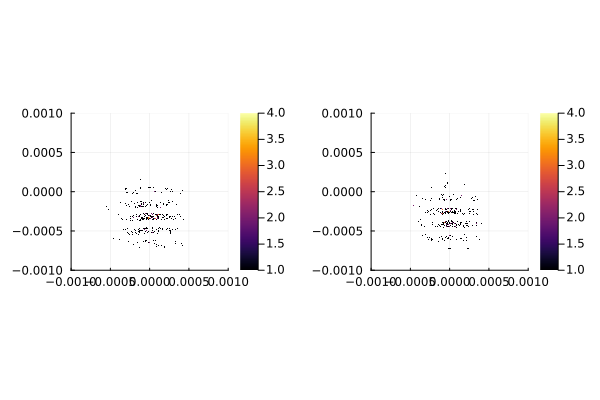

In [19]:
mask = [cos(x)^2 > 0.5 for x in phase_out[1]]

final_pos = pos_out[1]
p1 = histogram2d(final_pos[:,1][mask],final_pos[:,2][mask],xlimits=(-2*cloud_r,2*cloud_r),bins = (100,100),ylimits=(-2*cloud_r,2*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

p2 = histogram2d(final_pos[:,1][.!mask],final_pos[:,2][.!mask],xlimits=(-2*cloud_r,2*cloud_r),bins = (100,100),ylimits=(-2*cloud_r,2*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

display(plot(p1,p2,layout = (1,2)))

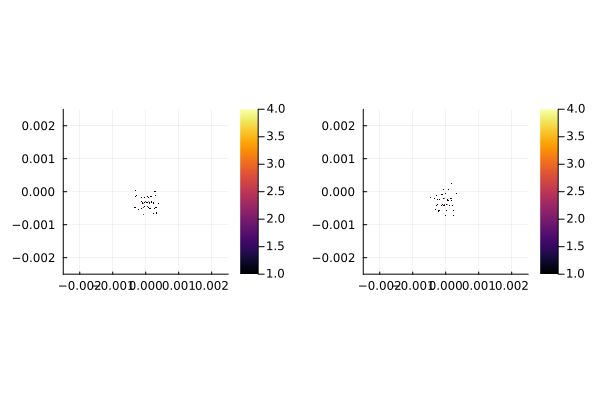

In [17]:
mask = [cos(x)^2 > 0.5 for x in phase_out[1]]

final_pos = pos_out[1]
p1 = histogram2d(final_pos[:,1][mask],final_pos[:,2][mask],xlimits=(-5*cloud_r,5*cloud_r),bins = (100,100),ylimits=(-5*cloud_r,5*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

p2 = histogram2d(final_pos[:,1][.!mask],final_pos[:,2][.!mask],xlimits=(-5*cloud_r,5*cloud_r),bins = (100,100),ylimits=(-5*cloud_r,5*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

display(plot(p1,p2,layout = (1,2)))

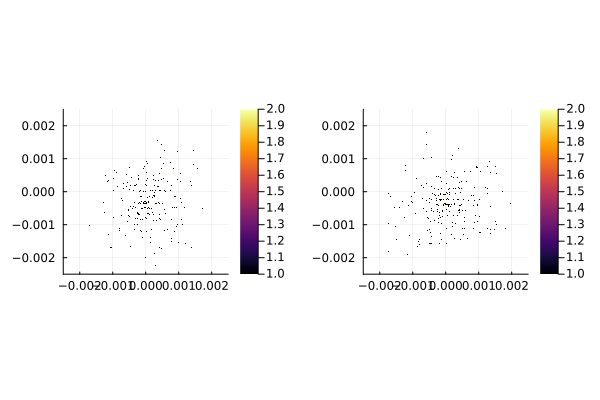

In [20]:
mask = [cos(x)^2 > 0.5 for x in phase_out[3]]

final_pos = pos_out[3]
p1 = histogram2d(final_pos[:,1][mask],final_pos[:,2][mask],xlimits=(-5*cloud_r,5*cloud_r),bins = (200,200),ylimits=(-5*cloud_r,5*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

p2 = histogram2d(final_pos[:,1][.!mask],final_pos[:,2][.!mask],xlimits=(-5*cloud_r,5*cloud_r),bins = (200,200),ylimits=(-5*cloud_r,5*cloud_r),aspect_ratio = :equal)#,clims = (0,160))#,color=phase_out[1])

display(plot(p1,p2,layout = (1,2)))

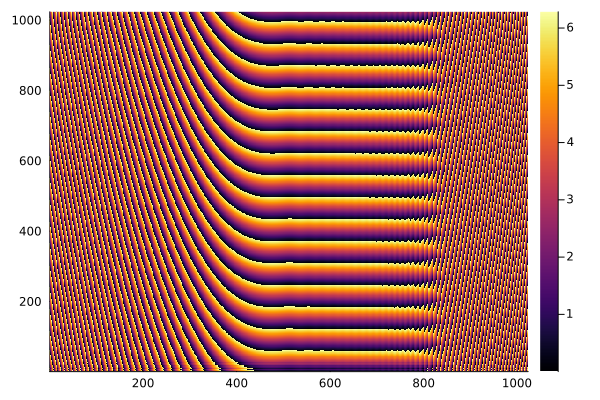

In [12]:
heatmap(phasemap)